In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Read the csv file and display it both in an output cell and a print cell 

In [2]:
data = pd.read_csv("../data/first-csv-file.csv")

In [3]:
data

,x,y
0,1.1,11.70
1,2.2,12.19
2,2.9,16.04
3,4.1,14.63
4,5.1,17.31
5,6.2,18.49
6,7.2,19.62
7,8.3,19.45


In [4]:
print(data)

     x      y
0  1.1  11.70
1  2.2  12.19
2  2.9  16.04
3  4.1  14.63
4  5.1  17.31
5  6.2  18.49
6  7.2  19.62
7  8.3  19.45


## Convert the data to a numpy array and use matplotlib.pyplot to make a scatter plot

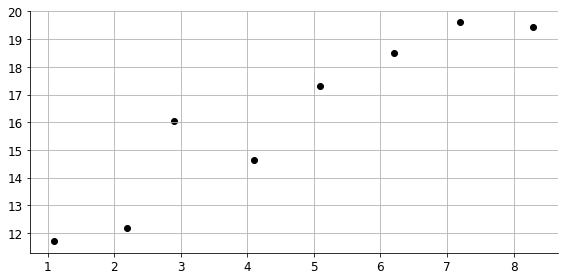

In [5]:
# extract x and y values into a numpy array

xyvals=np.array(data)
xvals=xyvals[:,0]
yvals=xyvals[:,1]

# make a scatter plot

plt.scatter(xvals,yvals,c="k")

# make in pretty

plt.grid() # add gridlines

# remove top and right line of frame
ax = plt.gca() 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# change font size

ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

# set figure size for output and save figure as a pdf file
f=plt.gcf()
f.set_size_inches(8,4)
f.tight_layout()
f.savefig("sample-scatter-plot.pdf")

## Make a simple scatter plot reading the data directly from the DataFrame instead of converting it to an array first

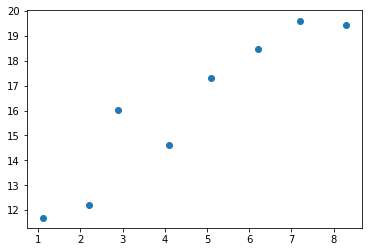

In [6]:
plt.scatter(data["x"],data["y"])

## Define a function to do linear regression

Input: two arrays x and y that must be the same length

Output: parameters a and b in fit of y=a+bx

In [7]:
def linear_regression(x, y):
    X=sum(x)
    Y=sum(y)
    A=sum(x*x)
    C=sum(x*y)
    n=len(x)
    Del=n*A-X*X
    if Del==0:
        print("System is singular!")
        return((0,0))
    a=(A*Y-X*C)/Del
    b=(n*C-X*Y)/Del
    return((a,b))

In [8]:
linear_regression(xvals,yvals)

(10.791852248092578, 1.1615952025676408)

10.791852248092578 1.1615952025676408


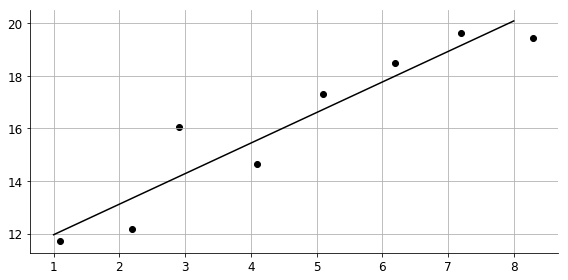

In [9]:
intercept, slope=linear_regression(xvals,yvals)
print(intercept, slope)
plt.scatter(data["x"],data["y"], c="k")
plt.plot([1,8],[intercept + slope*1, intercept+slope*8], c="k")
plt.grid() 
ax = plt.gca() 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
f=plt.gcf()
f.set_size_inches(8,4)
f.tight_layout()
f.savefig("first-linear-regression.pdf")

Example of output

In [10]:
intercept, slope=linear_regression(xvals,yvals)
print(intercept, slope)

10.791852248092578 1.1615952025676408


## Examples of Regression using polyfit

In [11]:
np.polyfit(xvals,yvals,1)

array([ 1.1615952 , 10.79185225])

In [12]:
np.polyfit(xvals,yvals,2)

array([-0.08137198,  1.92679945,  9.44483807])

In [13]:
coef=np.polyfit(xvals,yvals,7)

In [14]:
xv=np.linspace(1,8.5,100)
yv=np.polyval(coef,xv)

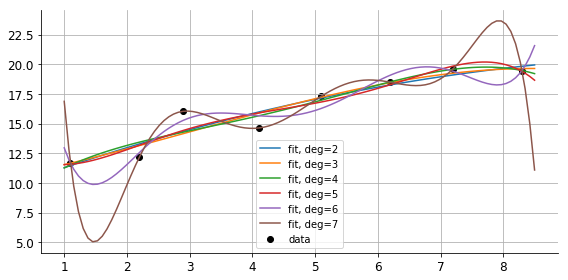

In [15]:
plt.scatter(data["x"],data["y"], c="k",label="data")
for j in range(2,8):
    coef=np.polyfit(xvals,yvals,j)
    yv = np.polyval(coef,xv)
    plt.plot(xv,yv,label="fit, deg="+str(j))
plt.legend()
plt.grid() 
ax = plt.gca() 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
f=plt.gcf()
f.set_size_inches(8,4)
f.tight_layout()
f.savefig("Multiple-Fits-To-Eight-Data-Points.pdf")

## Regresion using scipy.stat.linregress

In [16]:
from scipy.stats import linregress as LR

In [17]:
LR(xvals,yvals)

LinregressResult(slope=1.1615952025676397, intercept=10.791852248092571, rvalue=0.941717832188376, pvalue=0.00047355160326094863, stderr=0.16940229837546086)

## Define a regression function based on statistical parameters

In [18]:
np.corrcoef(xvals,yvals)[1,0]

0.9417178321883759

In [19]:
def linear_regression2(x,y):
    mux=np.mean(x)
    muy=np.mean(y)
    sx=np.std(x,ddof=1)
    sy=np.std(y,ddof=1)
    r=np.corrcoef(x,y)[1,0]
    b=r*sy/sx
    a=muy-b*mux
    print("intercept a=",a)
    print("slope b=    ",b)
    print("correlation=",r)
    return(a,b)
    

In [20]:
linear_regression2(xvals,yvals)

intercept a= 10.791852248092571
slope b=     1.1615952025676397
correlation= 0.9417178321883759


(10.791852248092571, 1.1615952025676397)

## Computer hardweare data set 
From UCI Machine Learning repository

Read the file and label the columns

In [21]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data",
                  header=None)
data.columns=["vendor","Model","MYCT","MMIN", "MMAX","CACH","CHMIN",
              "CHMAX","PRP","ERP"]

The following description is copied verbatim from 
https://archive.ics.uci.edu/ml/datasets/Computer+Hardware
Data Set Information:

The estimated relative performance values were estimated by the authors using a linear regression method. See their article (pp 308-313) for more details on how the relative performance values were set.


Attribute Information:

1. vendor name: 30 
(adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
sratus, wang) 
2. Model Name: many unique symbols 
3. MYCT: machine cycle time in nanoseconds (integer) 
4. MMIN: minimum main memory in kilobytes (integer) 
5. MMAX: maximum main memory in kilobytes (integer) 
6. CACH: cache memory in kilobytes (integer) 
7. CHMIN: minimum channels in units (integer) 
8. CHMAX: maximum channels in units (integer) 
9. PRP: published relative performance (integer) 
10. ERP: estimated relative performance from the original article (integer)

In [22]:
print(data[:5])

    vendor    Model  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0  adviser    32/60   125   256   6000   256     16    128  198  199
1   amdahl   470v/7    29  8000  32000    32      8     32  269  253
2   amdahl  470v/7a    29  8000  32000    32      8     32  220  253
3   amdahl  470v/7b    29  8000  32000    32      8     32  172  253
4   amdahl  470v/7c    29  8000  16000    32      8     16  132  132


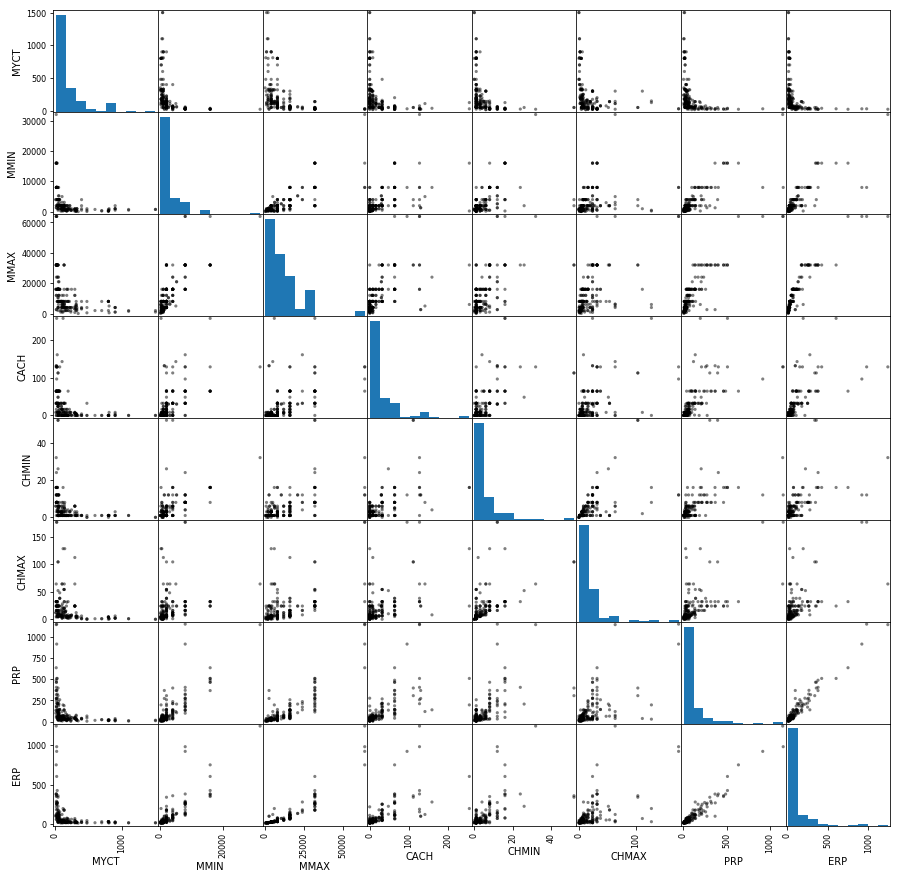

In [23]:
rr = pd.plotting.scatter_matrix(data, figsize=(15,15), 
                                marker="o",s=10,c="black")
fig=plt.gcf()
fig.savefig("computer-data-scatter-matrix.pdf")


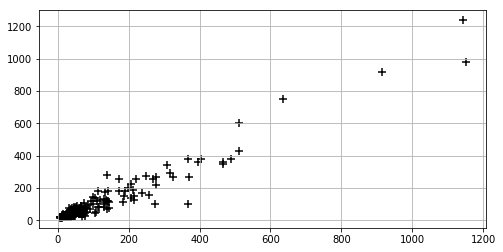

In [24]:
plt.scatter(data["PRP"],data["ERP"],s=60,marker="+",c="k")
plt.grid()
fig=plt.gcf()
fig.set_size_inches(8,4)

In [25]:
xvals=data["PRP"]
yvals=data["ERP"]

In [26]:
import random

In [27]:
n=len(data)
ind=list(range(n))
random.shuffle(ind)

In [28]:
ntrain=round(.75*n)
xtrain=xvals[ind[:ntrain]]
ytrain=yvals[ind[:ntrain]]
xtest=xvals[ind[ntrain:]]
ytest=yvals[ind[ntrain:]]

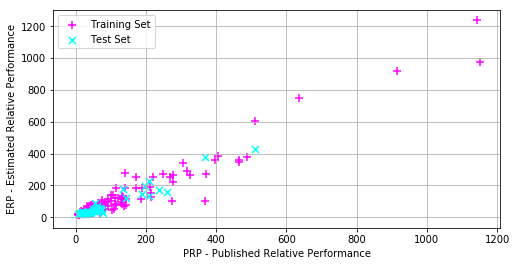

In [29]:
#plt.scatter(data["PRP"],data["ERP"],s=60,marker="+",c="k")
plt.scatter(xtrain,ytrain,c="magenta",marker="+",s=50,label="Training Set")
plt.scatter(xtest,ytest,c="cyan",marker="x",s=50,label="Test Set")
plt.grid()
plt.xlabel('PRP - Published Relative Performance')
plt.ylabel("ERP - Estimated Relative Performance")
plt.legend()
fig=plt.gcf()
fig.set_size_inches(8,4)
fig.savefig("PRP-ERP-PLOT.pdf")

In [30]:
from scipy.stats import linregress as LR
b,a,r,p,stderr=LR(xtrain,ytrain)
print(a,b,r)

1.8156716834228632 0.9366363636501873 0.9667514082080966


In [31]:
def MSS(a,b,X,Y):
    n=len(X)
    RSS=sum([(a+b*x-y)**2 for x,y in zip(X,Y)])
    return(RSS/n)

In [32]:
MSS(a,b,xtest,ytest)

593.5198714607145

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
#TRAIN=np.array([[x,y] for x,y in zip(xtrain,ytrain)])
#TEST=np.array([[x,y] for x,y in zip(xtest,ytest)])

In [35]:
#len(np.array([xtrain]))

In [36]:
XT=np.array(xtrain).reshape(-1,1)
YT=np.array(ytrain).reshape(-1,1)
r=LinearRegression().fit(XT,YT)
r.score(XT,YT), r.intercept_[0], r.coef_[0,0]

(0.9346082852723382, 1.8156716834228206, 0.9366363636501877)

In [37]:
r.intercept_, r.coef_

(array([1.81567168]), array([[0.93663636]]))

In [38]:
TX=np.array(xtest).reshape(-1,1)
TY=np.array(ytest).reshape(-1,1)
P=r.predict(TX)

In [39]:
mean_squared_error(TY,P)

593.5198714607149

In [40]:
sum([x*x for x in ((TY-P).T)[0]])/len(TY)

593.5198714607147

In [41]:
r2_score(TY,P)

0.9150389528470618

In [42]:
def ERP(PRP):
    return a+b*PRP

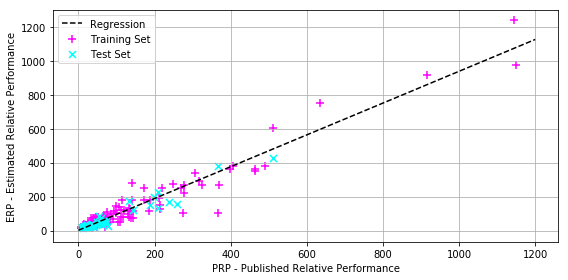

In [43]:
#plt.scatter(data["PRP"],data["ERP"],s=60,marker="+",c="k")
plt.scatter(xtrain,ytrain,c="magenta",marker="+",s=50,label="Training Set")
plt.scatter(xtest,ytest,c="cyan",marker="x",s=50,label="Test Set")
plt.plot([0,1200],[ERP(0),ERP(1200)],label="Regression",ls="--",c="k")
plt.grid()
plt.xlabel('PRP - Published Relative Performance')
plt.ylabel("ERP - Estimated Relative Performance")
plt.legend()
fig=plt.gcf()
fig.set_size_inches(8,4)
fig.tight_layout()
fig.savefig("PRP-ERP-FIT.pdf")